# Week 1 Assignment

## Part 1

### Creating the faster function

In [5]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from timeit import timeit
from numba import njit, jit, prange
import time

In [33]:
def slow_matrix_product(mat1, mat2):
    """Multiplies two matrices.
    This is the original slow matrix product function."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()


#creating random checking matrices
matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

assert np.allclose(slow_matrix_product(matrix1, matrix2), matrix1@matrix2)

In [124]:
#useful basic matrix
a = np.reshape(np.arange(0,10),(5,2))

print(a)
print(a.shape)
print(a[0,:])
print(a[:,0])

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
(5, 2)
[0 1]
[0 2 4 6 8]


In [27]:
def fast_matrix_product(mat1, mat2):
    """Faster matrix product function using the np.dot() function instead of simple addition.
    Using pre-made matrix array"""
    assert mat1.shape[1] == mat2.shape[0] #check matrices can be multiplied
    result = np.zeros((mat1.shape[0],mat2.shape[1])) #create storage array
    for c in range(mat2.shape[1]):
        for r in range(mat1.shape[0]):
            result[r,c] = np.dot(mat1[r,:],mat2[:,c]) #calculating elements in the array
    return result

In [126]:
#creating an assertion check for the new function for 2x2, 3x3, 4x4 and 5x5 matrices
n = np.array([2,3,4,5]) #array of matrix sizes

for i in range(len(n)):
    matrix1 = np.random.rand(n[i], n[i])
    matrix2 = np.random.rand(n[i], n[i])
    assert np.allclose(fast_matrix_product(matrix1, matrix2), matrix1@matrix2)

### Reasoning

1. In the faster function the np.dot() function is used to calculate individual matrix elements. The function is faster as it calculates the multiplication of the array elements simulatenously rather than having to loop through each element and find the sum total. This increase in efficiency of the function should decrease the time taken to calculate matrix products.

2. This function pre-makes a results matrix of zeros into which calculated values are placed rather than appending individual values to vector arrays and then appending vector arrays to the results matrix. This should make the function more efficient by decreasing the numer of overall proccesses.

### Timing the function

In [34]:
#timing individual matrix multiplications
size = 1000
num_repeats = 1

mat1 = np.random.rand(size, size)
mat2 = np.random.rand(size, size)

start = time.time()
timeit(lambda: fast_matrix_product(mat1, mat2),number = num_repeats)
end = time.time()
print("Time taken for fast matrix:", end-start)

start = time.time()
timeit(lambda: slow_matrix_product(mat1, mat2),number = num_repeats)
end = time.time()
print("Time taken for slow matrix:", end-start)

Time taken for fast matrix: 5.375599145889282
Time taken for slow matrix: 687.7182719707489


In [127]:
#creating a loop to time the functions over
n = np.logspace(0.4,3,12, dtype='int')
print('Matrix sizes:', n)
num_repeats1 = 3
store1 = np.zeros((2,len(n)))

for i, size in enumerate(n):
    mat1 = np.random.rand(size, size)
    mat2 = np.random.rand(size, size)
    
    start = time.time()
    store1[0,i] = timeit(lambda: fast_matrix_product(mat1, mat2),number = num_repeats1)
    store1[1,i] = timeit(lambda: slow_matrix_product(mat1, mat2),number = num_repeats1)
    end = time.time()
    print("Time taken for n =",size,':', np.round((end-start),decimals=4))

Matrix sizes: [   2    4    7   12   22   38   65  113  195  336  580 1000]
Time taken for n = 2 : 0.0009
Time taken for n = 4 : 0.0008
Time taken for n = 7 : 0.002
Time taken for n = 12 : 0.0066
Time taken for n = 22 : 0.0261
Time taken for n = 38 : 0.1402
Time taken for n = 65 : 0.3816
Time taken for n = 113 : 2.0098
Time taken for n = 195 : 9.6111
Time taken for n = 336 : 56.266
Time taken for n = 580 : 299.9908
Time taken for n = 1000 : 1421.7362


Text(0.5, 1.0, 'Comparison of computation time for fast and slow matrix multiplication functions for 3 repeats')

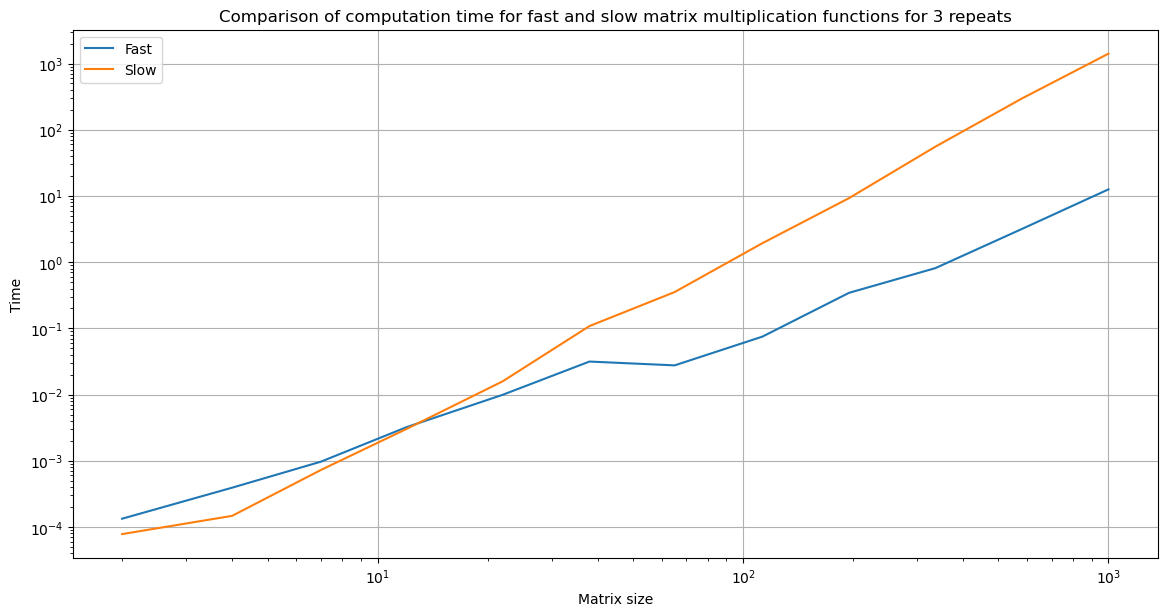

In [130]:
#plotting results of timings
plt.figure(figsize=(14,7), dpi=100)
plt.plot(n, store1[0,:], label ='Fast')
plt.plot(n, store1[1,:], label ='Slow')
plt.xlabel("Matrix size")
plt.ylabel("Time")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.title(f'Comparison of computation time for fast and slow matrix multiplication functions for {num_repeats1} repeats')

## Part 2

### Speeding up with Numba and Parallelisation

In [154]:
@jit(parallel=True)
def fast_matrix_product_n(mat1, mat2):
    """Faster matrix product function using the np.dot() function instead of simple addition.
    Using pre-made matrix array"""
    assert mat1.shape[1] == mat2.shape[0] #check matrices can be multiplied
    result = np.zeros((mat1.shape[0],mat2.shape[1])) #create storage array
    for c in prange(mat2.shape[1]):
        for r in prange(mat1.shape[0]):
            result[r,c] = np.dot(mat1[r,:],mat2[:,c]) #calculating elements in the array
    return result

In [159]:
#creating a loop to time the functions over
n = np.logspace(0.4,3,15, dtype='int') 
print('Matrix sizes:', n)
num_repeats2 = 30
store2 = np.zeros((5,len(n)))

#run numba compiled function once first
mat1 = np.random.rand(n[0], n[0])
mat2 = np.random.rand(n[0], n[0])
print('Initial time for 2x2 JIT matrix to run:', timeit(lambda: fast_matrix_product_n(mat1, mat2),number = num_repeats2))

for i, size in enumerate(n):
    mat1 = np.random.rand(size, size)
    mat2 = np.random.rand(size, size)
    
    start = time.time()
    store2[0,i] = timeit(lambda: fast_matrix_product(mat1, mat2),number = num_repeats2)
    store2[1,i] = timeit(lambda: fast_matrix_product_n(mat1, mat2),number = num_repeats2)
    store2[2,i] = timeit(lambda: mat1@mat2,number = num_repeats)
    end = time.time()
    print("Time taken for n =",size,':', np.round((end-start),decimals=4))

Initial time for 2x2 JIT matrix to run: 0.008768947001954075
Time taken for n = 2 : 0.0094
Time taken for n = 3 : 0.0098
Time taken for n = 5 : 0.0152
Time taken for n = 9 : 0.0611
Time taken for n = 13 : 0.0476
Time taken for n = 21 : 0.0694
Time taken for n = 32 : 0.1113
Time taken for n = 50 : 0.2961
Time taken for n = 76 : 0.4356
Time taken for n = 117 : 0.9775
Time taken for n = 180 : 2.6746
Time taken for n = 277 : 9.9216
Time taken for n = 425 : 21.6827
Time taken for n = 652 : 52.9146
Time taken for n = 1000 : 143.9059


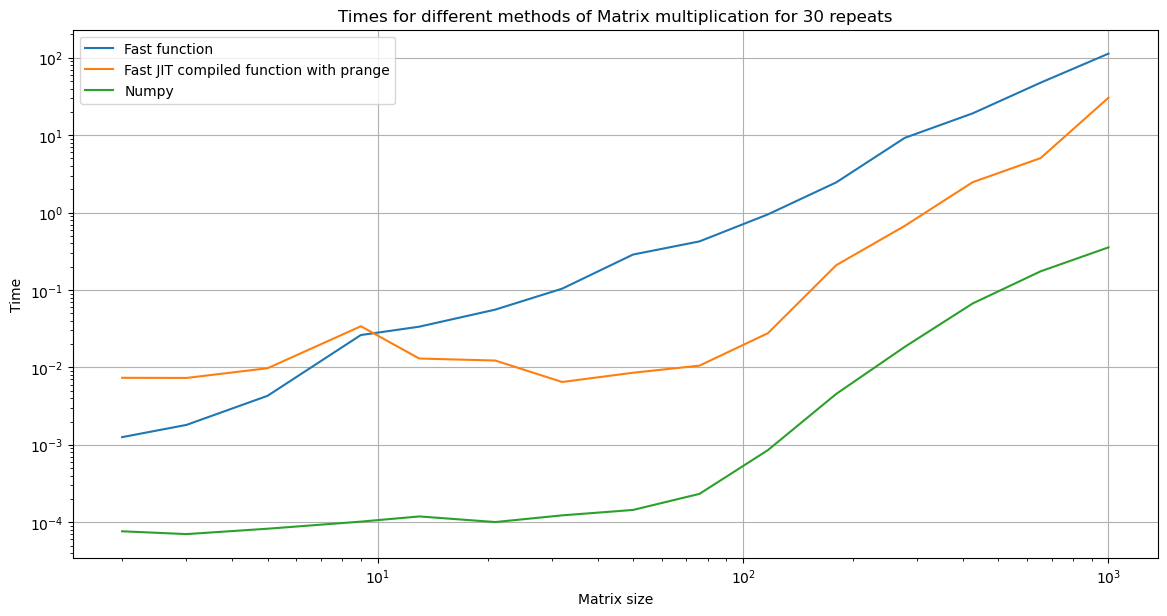

In [160]:
#plotting results of timings
plt.figure(figsize=(14,7), dpi=100)
plt.plot(n, store2[0,:], label ='Fast function')
plt.plot(n, store2[1,:], label ='Fast JIT compiled function with prange')
plt.plot(n, store2[2,:], label ='Numpy')
plt.xlabel("Matrix size")
plt.ylabel("Time")
plt.legend()
plt.grid()
plt.title(f'Times for different methods of Matrix multiplication for {num_repeats2} repeats')
plt.xscale('log')
plt.yscale('log')

### Results of Fast matrix multiplication comparison

It is possible to see that the prange function in a JIT compiled matrix begins to decrease compuation time in a significant manner when the matrices become larger than 10x10 in size.

### Testing the fast function for c-style and fortran-style arrays


In [167]:
#creating a loop to time the functions over
n = np.logspace(0.4,3,15, dtype='int')  #have an old computer that wouldnt run 15 variations up to 1000x1000
num_repeats3 = 30
store3 = np.zeros((4,len(n)))

for i, size in enumerate(n):
    mat1 = np.random.rand(size, size)
    mat1_f = np.asfortranarray(mat1)
    mat2 = np.random.rand(size, size)
    mat2_f = np.asfortranarray(mat2)
    
    start = time.time()
    store3[0,i] = timeit(lambda: fast_matrix_product_n(mat1, mat2),number = num_repeats3)
    store3[1,i] = timeit(lambda: fast_matrix_product_n(mat1_f, mat2),number = num_repeats3)
    store3[2,i] = timeit(lambda: fast_matrix_product_n(mat1, mat2_f),number = num_repeats3)
    store3[3,i] = timeit(lambda: fast_matrix_product_n(mat1_f, mat2_f),number = num_repeats3)
    end = time.time()
    print("Time taken for n =",size,':', np.round((end-start),decimals=4))

Time taken for n = 2 : 0.0252
Time taken for n = 3 : 0.0245
Time taken for n = 5 : 0.0179
Time taken for n = 9 : 0.0197
Time taken for n = 13 : 0.0512
Time taken for n = 21 : 0.0429
Time taken for n = 32 : 0.0242
Time taken for n = 50 : 0.0384
Time taken for n = 76 : 0.0483
Time taken for n = 117 : 0.1266
Time taken for n = 180 : 0.3912
Time taken for n = 277 : 1.542
Time taken for n = 425 : 9.6694
Time taken for n = 652 : 48.2453
Time taken for n = 1000 : 216.8471


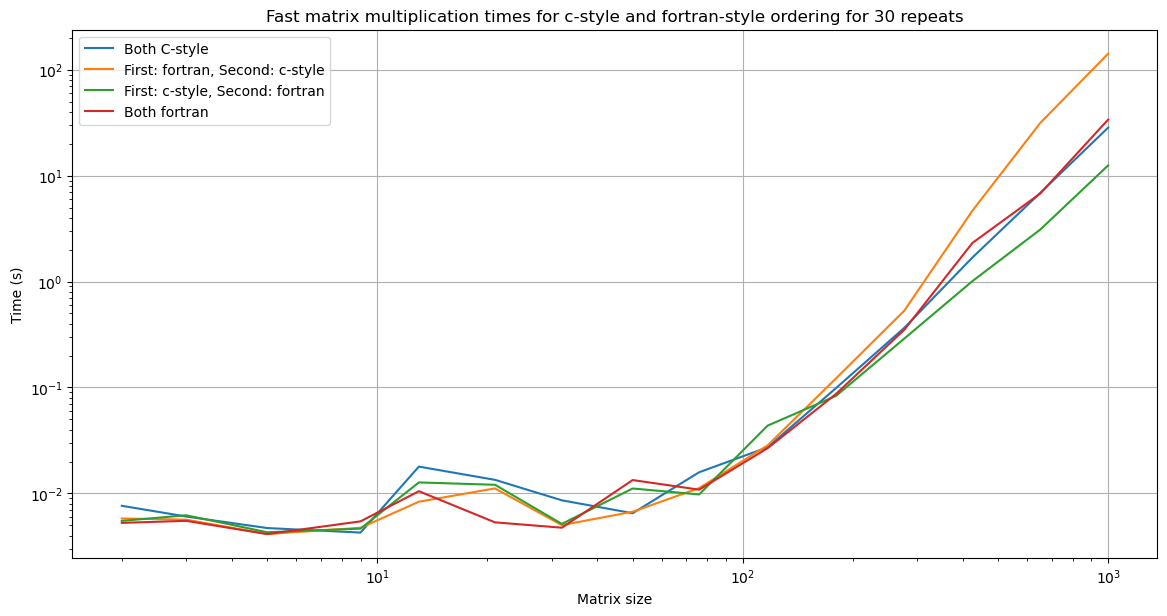

In [168]:
#plotting results of timings
plt.figure(figsize=(14,7), dpi=100)
plt.plot(n, store3[0,:], label ='Both C-style')
plt.plot(n, store3[1,:], label ='First: fortran, Second: c-style')
plt.plot(n, store3[2,:], label ='First: c-style, Second: fortran')
plt.plot(n, store3[3,:], label ='Both fortran')
plt.title(f'Fast matrix multiplication times for c-style and fortran-style ordering for {num_repeats3} repeats')
plt.xlabel("Matrix size")
plt.ylabel("Time (s)")
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')

### Conclusion of C-style/fortran-style ordering

As matrices are multiplied via the first matrix's rows and the second matrix's columns this means that when multiplying the most efficient calculation would be expected to be achieved in a configuration where the first matrix is stored in c-style and the second matrix is stored in fortran-style. This is because c-style stores information row by row, which is the order in which the values are accessed from the first matrix. Conversley fortran-style stores the information column by column and which is the order information is accessed when multiplying the second matrix. When the access order aligns with the storage order the computation efficiency is increased as the distance between each consecutive data piece is decreased requiring less work for the CPU.

In this test case above the explanation does follow through and can been seen to have an effect for matrices larger than around 200x200. The reverse of the optimal situation described above is the slowest as both arrays are the 'incorrect order' for the CPU to access the data. We can see the all-fortran and all-c layouts are similarly efficient as for these only one of the arrays is 'out of order' and as predicted the c-style matrix first and fortran-style last is most efficient